In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import sympy as sp



In [ ]:
#read csv file
data = pd.read_csv('/AGE.csv')
data

,SITE,CORE,SP,DBH,5YI,10YI,BHAGE
0,HR1,4,PISI,129.3,1.2,2.2,113
1,HR1,3,PISI,74.0,1.4,3.0,104
2,HR1,1,PISI,71.0,0.4,1.2,101
3,HR1,2,PISI,71.5,1.4,3.8,81
4,HR10,4,PISI,117.1,0.8,1.6,114
...,...,...,...,...,...,...,...
296,SU7,1,PSME,90.8,0.6,1.3,87
297,SU7,2,PSME,79.2,1.1,2.3,84
298,SU8,1,PSME,118.0,0.7,1.9,72
299,SU8,2,PSME,88.3,2.2,4.4,60


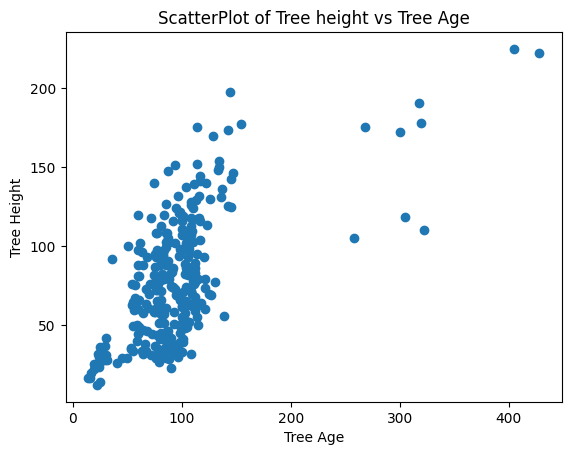

In [ ]:
plt.scatter(data['BHAGE'], data['DBH'])
plt.xlabel('Tree Age')
plt.ylabel('Tree Height')
plt.title('ScatterPlot of Tree height vs Tree Age')
plt.show()


In [ ]:
new_data = data[data['BHAGE'].astype(int) < 200]
new_data.count()

,0
SITE,292
CORE,292
SP,292
DBH,292
5YI,292
10YI,292
BHAGE,292


In [ ]:
PSME_lm_data= new_data[new_data['SP']== 'PSME']
x= PSME_lm_data['BHAGE']
y= PSME_lm_data['DBH']

X= sm.add_constant(x)

PSME_lm= sm.OLS(y, X).fit()
PSME_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBH   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           9.29e-19
Time:                        19:13:14   Log-Likelihood:                -639.73
No. Observations:                 142   AIC:                             1283.
Df Residuals:                     140   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5220      7.946      1.576      0.117      -3.188      28.232
BHAGE          0.8642      0.084     10.258      0.000       0.698       1.031
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.066
Skew:                          -0.050   Prob(JB):                        0.967
Kurtosis:                       3.035   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#rsquare and slope extraction
rsquare= PSME_lm.rsquared
slope= PSME_lm.params['BHAGE']
intercept= PSME_lm.params['const']
print(f"Multiple R-squared: {rsquare}")
print(f"Slope: {slope}")

Multiple R-squared: 0.4290798446206765
Slope: 0.8642336063618552


In [ ]:
#regression equation
x = sp.symbols('x')
slope_rounded= round(slope, 2)
intercept_rounded= round(intercept, 2)
regression_eq = slope_rounded * x + intercept_rounded
regression_eq

# Display the regression equation
equation_str = f"y = {regression_eq}"
print(equation_str)


y = 0.86*x + 12.52


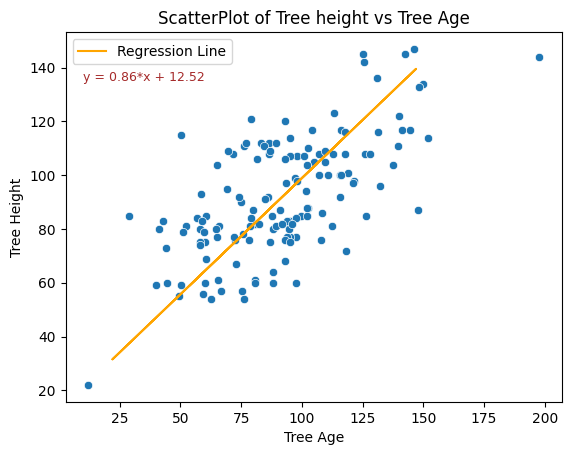

In [ ]:
#plotting the graph
sns.scatterplot(x='DBH', y='BHAGE', data= PSME_lm_data)
plt.xlabel('Tree Age')
plt.ylabel('Tree Height')
plt.plot(PSME_lm_data['BHAGE'], PSME_lm.predict(X), color='orange', label='Regression Line')
plt.text(10, 135, equation_str, fontsize=9, color='brown')
plt.title('ScatterPlot of Tree height vs Tree Age')
plt.legend()
plt.show()
